In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from pathlib import Path
import os

In [4]:
hs = pd.read_csv('eze.csv')
hs

,qtr,Total Hospital Beds,Average Available Beds,Average Occupied Beds,Hospital Death Rate (%),Maternal Deaths,Infant Deaths,Neonatal Deaths,Stillbirths,Live Births,...,Total Admissions,Total Discharges,Total Deaths,Total Attendance,New Attendance,Follow-up,Consultative clinics,Other Consultative,Clinic Section,Immunization Services
0,1st Quarter 2022,891,891,341,10.7,7,12,64,47,375,...,4450,3867,464,59844,13924,45950,33267,26577,4099,10218
1,1st Quarter 2023,883,780,325,9.4,3,25,36,49,380,...,5060,3678,442,57726,12655,45071,30057,27669,4130,9739
2,2nd Quarter 2022,891,891,227,9.7,8,15,39,40,425,...,5050,4489,484,62931,15128,47803,34016,28915,4080,7091
3,2nd Quarter 2023,883,819,282,10.3,5,9,16,47,392,...,4530,3362,384,47361,10732,36629,22931,24430,3231,9453
4,3rd Quarter 2022,891,891,345,8.7,9,8,25,34,400,...,5505,4527,429,68829,14601,54228,36501,32328,4290,7836
5,3rd Quarter 2023,883,842,247,9.4,8,6,9,29,299,...,3912,2905,301,51875,11003,40872,25260,26615,3814,10411
6,4th Quarter 2022,891,891,313,10.0,5,11,22,50,449,...,5354,4088,454,61861,13411,48450,33529,28332,4123,6094
7,4th Quarter 2023,883,852,289,10.9,5,6,16,35,370,...,4706,3512,432,55891,12285,43606,28745,27146,3773,4867


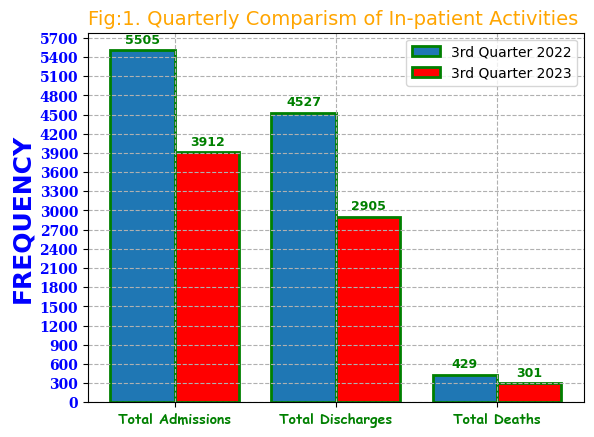

In [12]:
subjects = ['Total Admissions', 'Total Discharges', 'Total Deaths']
dataset = hs.groupby('qtr')[subjects].mean()
indx = np.arange(len(subjects))
score_label = np.arange(0,6000, 300)
last = list(dataset.T['3rd Quarter 2022'])
this = list(dataset.T['3rd Quarter 2023'])

barWidth = 0.4



fig, ax = plt.subplots()
# fig = plt.figure(figsize=(9,5))
barlast = ax.bar(indx - barWidth/2, last, barWidth, label='3rd Quarter 2022', linewidth=2, edgecolor="green")
barthis = ax.bar(indx + barWidth/2, this, barWidth, label='3rd Quarter 2023', linewidth=2, edgecolor="green", color='red')


plt.title('Fig:1. Quarterly Comparism of In-patient Activities ', color='orange', size=14)

# , family='cursive', color='green', weight='bold'
#  , family='serif', color='blue', weight='bold

# Insert x axis label
ax.set_xticks(indx)
ax.set_xticklabels(subjects, family='cursive', color='green', weight='bold')

# Insert y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label, family='serif', color='blue', weight='bold')

# Insert Legend
ax.legend()



def insert_data_label(bars):
    for bar in bars:
        bar_height = bar.get_height()
        plt.annotate('{0:.0f}'.format(bar.get_height()),
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha="center",
                   va="bottom" ,
                   color='green',
                   weight='bold',  
                   fontsize=9,

       )
        
insert_data_label(barlast)
insert_data_label(barthis)

plt.ylabel('FREQUENCY', rotation=90, color='blue', size=18, weight='bold')

fig.savefig("../Report/Mr. Oladele/3rd 2023/img/fig1.png")
# C:\Users\havil\OneDrive\Desktop\blessed\2\Report\Mr. Oladele\4th 2023\img
plt.grid(linestyle='--')  # color='magenta'

plt.show()

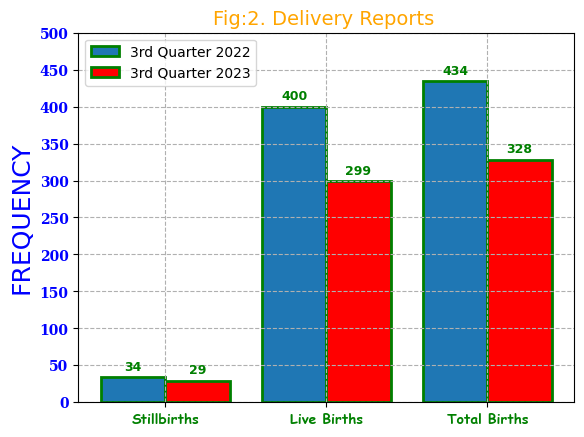

In [13]:
subjects = ['Stillbirths','Live Births', 'Total Births']
dataset = hs.groupby('qtr')[subjects].mean()
indx = np.arange(len(subjects))   
score_label = np.arange(0,550, 50)
last = list(dataset.T['3rd Quarter 2022'])
this = list(dataset.T['3rd Quarter 2023'])

barWidth = 0.4



fig, ax = plt.subplots()
# fig = plt.figure(figsize=(9,5))
barlast = ax.bar(indx-barWidth/2, last, barWidth, label='3rd Quarter 2022', linewidth=2, edgecolor="green")
barthis = ax.bar(indx + barWidth/2, this, barWidth, label='3rd Quarter 2023', linewidth=2, edgecolor="green", color='red')


plt.title('Fig:2. Delivery Reports ', color='orange', size=14)


# Insert x axis label
ax.set_xticks(indx)
ax.set_xticklabels(subjects, family='cursive', color='green', weight='bold')

# , family='cursive', color='green', weight='bold'
#  , family='serif', color='blue', weight='bold

# Insert y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label, family='serif', color='blue', weight='bold')

# Insert Legend
ax.legend()

def insert_data_label(bars):
    for bar in bars:
        bar_height = bar.get_height()
        plt.annotate('{0:.0f}'.format(bar.get_height()),
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha="center",
                   va="bottom" ,
                   color='green',
                   fontsize=9,
                   weight='bold'  

       )
        
insert_data_label(barlast)
insert_data_label(barthis)

plt.ylabel('FREQUENCY', rotation=90, color='blue', size=18)

fig.savefig("../Report/Mr. Oladele/3rd 2023/img/fig2.png")
plt.grid(linestyle='--') 
plt.show()

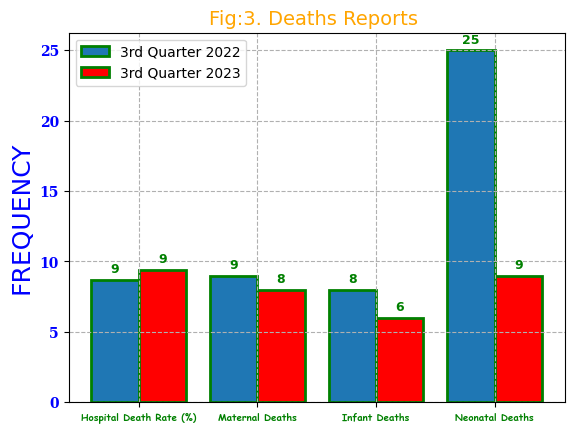

In [15]:
subjects = ['Hospital Death Rate (%)','Maternal Deaths', 'Infant Deaths', 'Neonatal Deaths']
dataset = hs.groupby('qtr')[subjects].mean()
indx = np.arange(len(subjects))
score_label = np.arange(0, 30, 5)
last = list(dataset.T['3rd Quarter 2022'])
this = list(dataset.T['3rd Quarter 2023'])

barWidth = 0.4



fig, ax = plt.subplots()
# fig = plt.figure(figsize=(9,5))
barlast = ax.bar(indx-barWidth/2, last, barWidth, label='3rd Quarter 2022', linewidth=2, edgecolor="green")
barthis = ax.bar(indx + barWidth/2, this, barWidth, label='3rd Quarter 2023', linewidth=2, edgecolor="green", color='red')


plt.title('Fig:3. Deaths Reports ', color='orange', size=14)


# Insert x axis label
plt.xticks(fontweight=600,  color='#000', size=8)
ax.set_xticks(indx)
ax.set_xticklabels(subjects , family='cursive', size=7, color='green') # , weight='bold', rotation='vertical'

# Insert y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label, family='serif', color='blue', weight='bold')

# , family='cursive', color='green', weight='bold'
#  , family='serif', color='blue', weight='bold


# Insert Legend
ax.legend()

def insert_data_label(bars):
    for bar in bars:
        bar_height = bar.get_height()
        plt.annotate('{0:.0f}'.format(bar.get_height()),
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha="center",
                   va="bottom" ,
                   color='green',
                   fontsize=9,
                   weight='bold'  

       )
        
insert_data_label(barlast)
insert_data_label(barthis)
# fig = plt.figure(figsize=(16,9))

plt.ylabel('FREQUENCY', color='blue', size=18)

fig.savefig("../Report/Mr. Oladele/3rd 2023/img/fig3.png")
plt.grid(linestyle='--') 
plt.show()

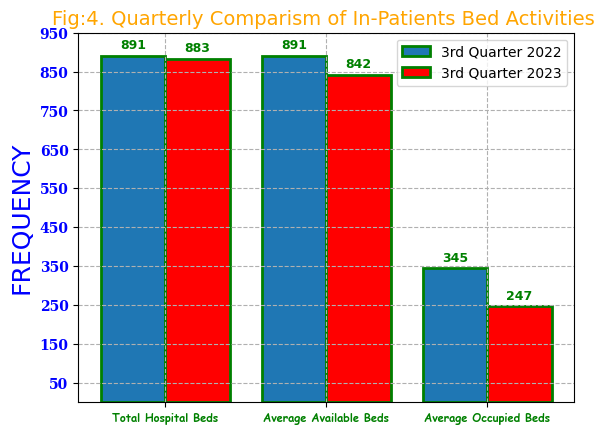

In [16]:
subjects = ['Total Hospital Beds', 'Average Available Beds','Average Occupied Beds']
dataset = hs.groupby('qtr')[subjects].mean()
indx = np.arange(len(subjects))
score_label = np.arange(50, 1000, 100)
last = list(dataset.T['3rd Quarter 2022'])
this = list(dataset.T['3rd Quarter 2023'])

barWidth = 0.4



fig, ax = plt.subplots()
# fig = plt.figure(figsize=(9,5))
barlast = ax.bar(indx-barWidth/2, last, barWidth, label='3rd Quarter 2022', linewidth=2, edgecolor="green")
barthis = ax.bar(indx + barWidth/2, this, barWidth, label='3rd Quarter 2023', linewidth=2, edgecolor="green", color="red")


plt.title('Fig:4. Quarterly Comparism of In-Patients Bed Activities ', color='orange', size=14)


# Insert x axis label
plt.xticks(fontweight=600,  color='#000', size=6)
ax.set_xticks(indx)
ax.set_xticklabels(subjects, family='cursive', color='green', weight='bold',size=8)


# , family='cursive', color='green', weight='bold'
#  , family='serif', color='blue', weight='bold


# Insert y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label, family='serif', color='blue', weight='bold')

# Insert Legend
ax.legend()

def insert_data_label(bars):
    for bar in bars:
        bar_height = bar.get_height()
        plt.annotate('{0:.0f}'.format(bar.get_height()),
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha="center",
                   va="bottom" ,
                   color='green',
                   fontsize=9,
                   weight='bold'  

       )
        
insert_data_label(barlast)
insert_data_label(barthis)

plt.ylabel('FREQUENCY', rotation=90, color='blue', size=18)

fig.savefig("../Report/Mr. Oladele/3rd 2023/img/fig4.png")
plt.grid(linestyle='--') 
plt.show()

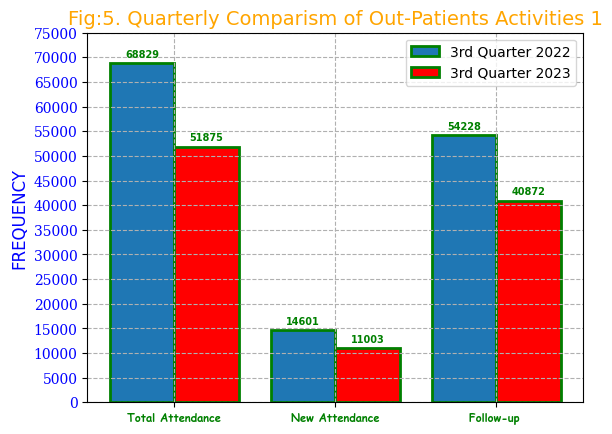

In [17]:
subjects = ['Total Attendance','New Attendance','Follow-up '] # , 'Consultative clinics', 'Other Consultative'
dataset = hs.groupby('qtr')[subjects].mean()
indx = np.arange(len(subjects))
score_label = np.arange(0, 75500, 5000)
last = list(dataset.T['3rd Quarter 2022'])
this = list(dataset.T['3rd Quarter 2023'])

barWidth = 0.4

fig, ax = plt.subplots()
# fig = plt.figure(figsize=(9,5))

barlast = ax.bar(indx - barWidth/2, last, barWidth, label='3rd Quarter 2022', linewidth=2, edgecolor="green")
barthis = ax.bar(indx + barWidth/2, this, barWidth, label='3rd Quarter 2023', linewidth=2, edgecolor="green", color='red')


plt.title('Fig:5. Quarterly Comparism of Out-Patients Activities 1', color='orange', size=14)


# Insert x axis label
plt.xticks(fontweight=600,  color='#000', size=6)
ax.set_xticks(indx)
ax.set_xticklabels(subjects, family='cursive', color='green', weight='bold', size=8)


# , family='cursive', color='green', weight='bold'
#  , family='serif', color='blue', weight='bold

# Insert y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label, family='serif', color='blue')

# Insert Legend
ax.legend()

def insert_data_label(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha="center",
                   va="bottom" ,
                   color='green',
                   fontsize=7,
                   weight='bold' 

       )
        
insert_data_label(barlast)
insert_data_label(barthis)

plt.ylabel('FREQUENCY', rotation=90, color='blue', size=12)

fig.savefig("../Report/Mr. Oladele/3rd 2023/img2/fig5.png")
plt.grid(linestyle='--') 
plt.show()

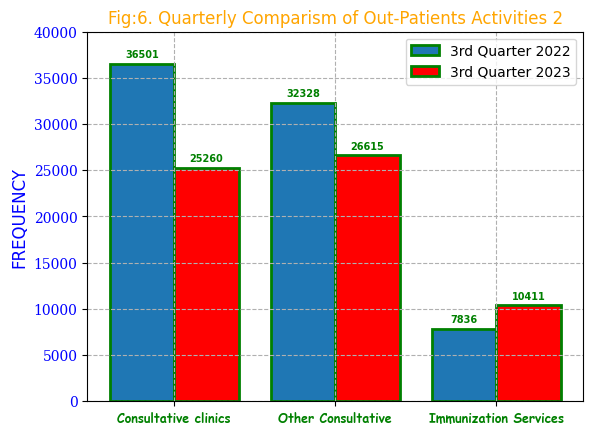

In [18]:
subjects = ['Consultative clinics', 'Other Consultative', 'Immunization Services'] 
dataset = hs.groupby('qtr')[subjects].mean()
indx = np.arange(len(subjects))
score_label = np.arange(0, 45000, 5000)
last = list(dataset.T['3rd Quarter 2022'])
this = list(dataset.T['3rd Quarter 2023'])

barWidth = 0.4

fig, ax = plt.subplots()
# fig = plt.figure(figsize=(9,5))

barlast = ax.bar(indx - barWidth/2, last, barWidth, label='3rd Quarter 2022', linewidth=2, edgecolor="green")
barthis = ax.bar(indx + barWidth/2, this, barWidth, label='3rd Quarter 2023', linewidth=2, edgecolor="green", color='red')


plt.title('Fig:6. Quarterly Comparism of Out-Patients Activities 2', color='orange', size=12)


# Insert x axis label
plt.xticks(fontweight=600,  color='#000', size=6)
ax.set_xticks(indx)
ax.set_xticklabels(subjects, family='cursive', color='green', weight='bold', size=9)


# , family='cursive', color='green', weight='bold'
#  , family='serif', color='blue', weight='bold

# Insert y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label, family='serif', color='blue')

# Insert Legend
ax.legend()

def insert_data_label(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha="center",
                   va="bottom" ,
                   color='green',
                   fontsize=7,
                   weight='bold' 

       )
        
insert_data_label(barlast)
insert_data_label(barthis)

plt.ylabel('FREQUENCY', rotation=90, color='blue', size=12)

fig.savefig("../Report/Mr. Oladele/3rd 2023/img2/fig6.png")
plt.grid(linestyle='--') 
plt.show()